In [11]:
import importlib
import hmmnorm as hm
importlib.reload(hm)

import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as spo
from hmmlearn.hmm import GaussianHMM
import random
import pandas as pd
import numpy.random as rnd
import scipy.stats as stats
from tqdm import tqdm
np.random.seed(893)

[[0.9, 0.09999999999999998], [0.09999999999999998, 0.9]]
[[0.85181644 0.14818356]
 [0.1636936  0.8363064 ]]


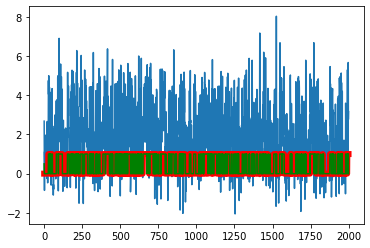

In [13]:
#Step 1: We initiate the data
p11= random.random()+0.0001
p22 = random.random() + 0.0001

p11= 0.9
p22=0.9
p12 = 1 - p11
p21 = 1 - p22
u0 = 1
u1 = 3
sig= 1
sig2=2
t=2000

transmat = [[p11,p12],[p21,p22]]
params=[u0,u1,sig,p11,p22,sig2]

#Step 2, we generate states according to the matrix
x = hm.generate_state(transmat, t)

#Step 3, we generate the ar according to the states
y = hm.generateNorm(params, x)

#Step 4 we generate the probabilities with the filter
p1filt,p2filt = hm.generate_p(params, y)

#Step 5: We obtain the states predicted by the filts
hmmstates = hm.hmm(p1filt,p2filt)

#Step 6: We find the transition matrix accroding to the predicted states
hmmtransmat = hm.find_transition(hmmstates)

#Step 7: optimize the parameters
optimizeroutput = hm.optimize(y)



x_axis = range(len(x))



y_axis1 = y

y_axis2 = x
y_axis3= hmmstates

print(transmat)
print(hmmtransmat)

plt.plot(x_axis,y_axis1)
plt.plot(x_axis,y_axis2, color= "red", linewidth ="6")
plt.plot(x_axis,y_axis3, color = "green")

plt.show()